In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%config Completer.use_jedi = False

### LearningRateScheduler callback 객체에 입력된 scheduler 함수 선언
* epoch 증가 시 LR이 exponetially decay 되도록 설정.

In [3]:
# learning rate를 동적으로 만들어주는 샘플 함수

import tensorflow as tf
import numpy as np

def scheduler_exp(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * np.exp(-1.0)

2024-03-18 12:15:57.759472: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 12:15:57.759589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 12:15:57.887550: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### LearningRateScheduler로 Learning Rate를 epochs시마다 변경하기
* LearningRateScheduler 객체 생성 시 인자로 scheduler 함수 입력하여 생성
* model.fit() callbacks 인자로 LearningRateScheduler 객체 입력

In [4]:
np.arange(100).reshape(5, 20)

np.zeros((5,1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.callbacks import LearningRateScheduler


def scheduler_exp(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * np.exp(-1.0)


# 테스트용 임시 모델 생성
model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')

# optimzer의 learning rate 찾기
print(model.optimizer.get_config())

# LearningRateScheduler 객체에 인자로 scheduler_exp 함수 등록
lr_scheduler = LearningRateScheduler(scheduler_exp, verbose=1)

history = model.fit(np.arange(100).reshape(5, 20), np.zeros((5,1)),
                   epochs=15, callbacks=[lr_scheduler], verbose=1)

{'name': 'SGD', 'learning_rate': 0.009999999776482582, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'momentum': 0.0, 'nesterov': False}

Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2779.2200 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.003678794329486961.
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 46862404.0000 - learning_rate: 0.0037

Epoch 3: LearningRateScheduler setting learning rate to 0.0013533527735202998.
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 104394563584.0000 - learning_rate: 0.0014

Epoch 4: LearningRateScheduler setting learning rate to 0.0004978706704056293.
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 29223408369664.0000 - learning

I0000 00:00:1710764169.693763      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710764169.709128      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10939809136640.0000 - learning_rate: 9.1188e-06

Epoch 9: LearningRateScheduler setting learning rate to 3.3546261977665306e-06.
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8481963245568.0000 - learning_rate: 3.3546e-06

Epoch 10: LearningRateScheduler setting learning rate to 1.2340980071972147e-06.
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7752762523648.0000 - learning_rate: 1.2341e-06

Epoch 11: LearningRateScheduler setting learning rate to 4.53999290682683e-07.
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7504084860928.0000 - learning_rate: 4.5400e-07

Epoch 12: LearningRateScheduler setting learning rate to 1.6701700564713763e-07.
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7415080157184.0000 - learning_rate: 1.6702e-07

Epoch 13: LearningRateScheduler setting learning rate to 6.144212299791123e-08.
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7382662905856.0000 - le

### scheduler_exp 함수 결과를 시각화

In [6]:
def scheduler_exp(epoch):
    initial_lr = 0.01
    if epoch < 1:
        return initial_lr
    else:
        return initial_lr * np.exp(-1.0)**epoch
    
model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')

# LearningRateScheduler 객체에 인자로 scheduler_exp 함수 등록
lr_scheduler = LearningRateScheduler(scheduler_exp, verbose=1)
history = model.fit(np.arange(100).reshape(5,20), np.zeros((5,1)),
                   epochs=15, callbacks=[lr_scheduler], verbose=1)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - loss: 6359.7222 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.003678794411714424.
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 107381864.0000 - learning_rate: 0.0037

Epoch 3: LearningRateScheduler setting learning rate to 0.0013533528323661274.
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 239212806144.0000 - learning_rate: 0.0014

Epoch 4: LearningRateScheduler setting learning rate to 0.0004978706836786397.
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 66963367788544.0000 - learning_rate: 4.9787e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.00018315638888734192.
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2042571421384704.0000 - learning_rate: 1.8316e-04

Epoch 6: LearningRateScheduler setting learning rate to 6.737946999085473e-05.
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

W0000 00:00:1710764170.614231      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 25067792629760.0000 - learning_rate: 9.1188e-06

Epoch 9: LearningRateScheduler setting learning rate to 3.3546262790251236e-06.
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19435815436288.0000 - learning_rate: 3.3546e-06

Epoch 10: LearningRateScheduler setting learning rate to 1.2340980408667975e-06.
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 17764905385984.0000 - learning_rate: 1.2341e-06

Epoch 11: LearningRateScheduler setting learning rate to 4.539992976248494e-07.
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 17195076681728.0000 - learning_rate: 4.5400e-07

Epoch 12: LearningRateScheduler setting learning rate to 1.6701700790245693e-07.
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 16991125504000.0000 - learning_rate: 1.6702e-07

Epoch 13: LearningRateScheduler setting learning rate to 6.144212353328224e-08.
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 16916849623040.000

In [7]:
epoch_list = range(30)
lr_list = [scheduler_exp(epoch) for epoch in epoch_list]

lr_list

[0.01,
 0.003678794411714424,
 0.0013533528323661274,
 0.0004978706836786397,
 0.00018315638888734192,
 6.737946999085473e-05,
 2.4787521766663612e-05,
 9.118819655545175e-06,
 3.3546262790251236e-06,
 1.2340980408667975e-06,
 4.539992976248494e-07,
 1.6701700790245693e-07,
 6.144212353328224e-08,
 2.2603294069810598e-08,
 8.3152871910357e-09,
 3.0590232050182664e-09,
 1.1253517471925945e-09,
 4.1399377187851794e-10,
 1.5229979744712678e-10,
 5.602796437537287e-11,
 2.0611536224385655e-11,
 7.582560427911936e-12,
 2.789468092868936e-12,
 1.0261879631701935e-12,
 3.7751345442791145e-13,
 1.3887943864964086e-13,
 5.10908902806335e-14,
 1.8795288165390926e-14,
 6.9144001069402386e-15,
 2.5436656473769363e-15]

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_scheduler(epochs_list, lr_list, title=None):
    plt.figure(figsize=(6,4))
    plt.plot(epoch_list,lr_list)
    plt.xlabel('epochs')
    plt.ylabel('learning rate')
    plt.title(title)

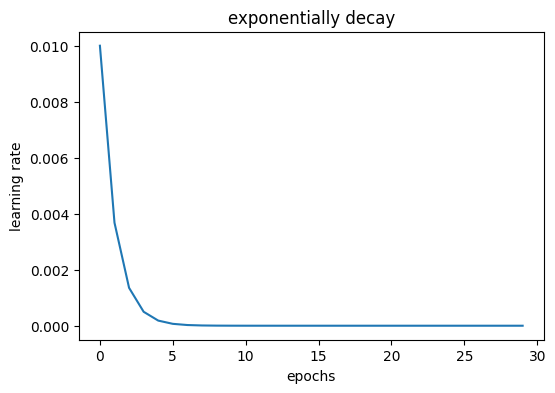

In [9]:
plot_scheduler(epoch_list, lr_list, title='exponentially decay')

### 또 다른 함수(step_decay)로 LearningRateScheduler 객체 생성하여 LR 조절

0 0.1
1 0.1
2 0.1
3 0.1
4 0.1
5 0.05
6 0.05
7 0.05
8 0.05
9 0.05
10 0.025
11 0.025
12 0.025
13 0.025
14 0.025
15 0.0125
16 0.0125
17 0.0125
18 0.0125
19 0.0125
20 0.00625
21 0.00625
22 0.00625
23 0.00625
24 0.00625
25 0.003125
26 0.003125
27 0.003125
28 0.003125
29 0.003125


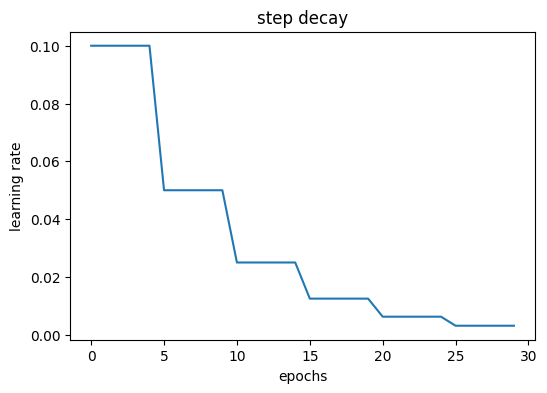

In [10]:
import tensorflow as tf

def step_decay(epoch):
    initial_lr = 0.1
    drop = 0.5
    epochs_drop = 5.0
    lr = initial_lr * (drop ** np.floor((epoch)/epochs_drop))
    print(epoch, lr)
    return lr

lr_list = [step_decay(epoch) for epoch in epoch_list]
plot_scheduler(epoch_list, lr_list, title='step decay')

In [11]:
model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')
print('초기 learning_rate: ', model.optimizer.get_config().get('learning_rate'))

lr_scheduler = LearningRateScheduler(step_decay, verbose=1)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros((5, 1)),
                   epochs=15, callbacks=[lr_scheduler], verbose=1)

초기 learning_rate:  0.009999999776482582
0 0.1

Epoch 1: LearningRateScheduler setting learning rate to 0.1.
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - loss: 4480.3887 - learning_rate: 0.1000
1 0.1

Epoch 2: LearningRateScheduler setting learning rate to 0.1.
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7661446144.0000 - learning_rate: 0.1000
2 0.1

Epoch 3: LearningRateScheduler setting learning rate to 0.1.
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13131085118439424.0000 - learning_rate: 0.1000
3 0.1

Epoch 4: LearningRateScheduler setting learning rate to 0.1.
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 22505597475278515339264.0000 - learning_rate: 0.1000
4 0.1

Epoch 5: LearningRateScheduler setting learning rate to 0.1.
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 38572735695711893286941622272.0000 - learning_rate: 0.1000
5 0.05

Epoch 6: LearningRateScheduler setting learning rate to 0.05.
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━

W0000 00:00:1710764172.312299      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: inf - learning_rate: 0.0500
9 0.05

Epoch 10: LearningRateScheduler setting learning rate to 0.05.
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: inf - learning_rate: 0.0500
10 0.025

Epoch 11: LearningRateScheduler setting learning rate to 0.025.
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: inf - learning_rate: 0.0250
11 0.025

Epoch 12: LearningRateScheduler setting learning rate to 0.025.
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: inf - learning_rate: 0.0250
12 0.025

Epoch 13: LearningRateScheduler setting learning rate to 0.025.
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: inf - learning_rate: 0.0250
13 0.025

Epoch 14: LearningRateScheduler setting learning rate to 0.025.
Epoch 14/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: inf - learning_rate: 0.0250
14 0.025

Epoch 15: LearningRateScheduler setting learning rate to 0.025.
Epoch 15/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - los

In [12]:
import tensorflow as tf

print(tf.__version__)

2.15.0


### Cosine Decay 적용하기
* Tensorflow 2.x은 cosine decay를 tf.keras.optimizers.schedules에서 제공한다.
* tf.keras.experimental.CosineDecay는 callback이 아니라 optimizer의 LearningRateSchedule이며, model.compile()의 optimizer인자의 learning_rate로 값 부여
* initial_learning_rate는 초기 learning rate 값
* decay steps는 몇 step에 결쳐 learning rate를 감소시키는지 해딩 과정의 수
* alpha는 최소 learning rate이고
* 최소 learning rate = alpha * initial_learning_rate이다.

In [13]:
from tensorflow.keras.optimizers.schedules import CosineDecay

cosine_decay = CosineDecay(initial_learning_rate=1e-2, decay_steps=30, alpha=1e-2)

type(cosine_decay)

keras.src.optimizers.schedules.learning_rate_schedule.CosineDecay

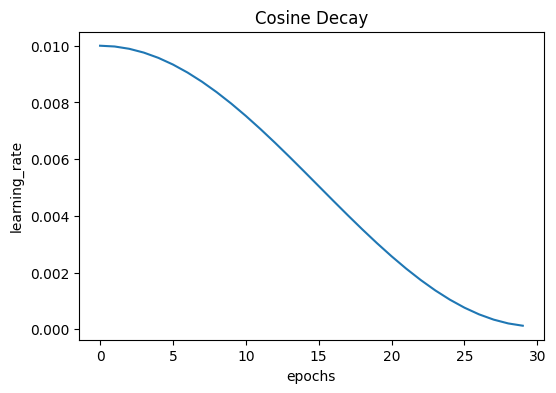

In [14]:
from tensorflow.keras.optimizers.schedules import CosineDecay

import matplotlib.pyplot as plt
%matplotlib inline

def plot_scheduler(epochs_list, lr_list, title=None):
    plt.figure(figsize=(6,4))
    plt.plot(epochs_list, lr_list)
    plt.xlabel('epochs')
    plt.ylabel('learning_rate')
    plt.title(title)
    
cosine_decay = CosineDecay(initial_learning_rate=1e-2, decay_steps=30,alpha=1e-2)

epochs_list = [i for i in range(0, 30)]
lr_list = cosine_decay(epochs_list)

plot_scheduler(epochs_list, lr_list, 'Cosine Decay')

### CosineDecay를 사용하기 위해선 optimizer의 learning rate인자로 입력되어야 한다.
* CosineDecay의 경우 callback이 아니므로 fit이 아닌 compile 단게에서 사용되어야 한다.

In [15]:
# keras는 epoch 단위로 learning rate를 뽑아낸다.
# 하지만 cosine decay를 사용하게 되면 step 단위로 learning rate를 뽑아내서 learning rate를 확인하기 어렵다.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

test_model = Sequential([Dense(units=10)])
test_model.compile(optimizer=Adam(learning_rate=cosine_decay), loss='mse')
history = test_model.fit(np.arange(100).reshape(5,20), np.zeros((5,1)), epochs=15, verbose=1)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step - loss: 4443.4844
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3354.9009
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2497.6116
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1856.5375
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1374.5742
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1009.4174
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 745.3406
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 566.2536
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 449.2372
Epoch 10/15


W0000 00:00:1710764174.897322      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 370.6284
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 312.5311
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 264.2219
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 220.7915
Epoch 14/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 181.1340
Epoch 15/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 146.0359


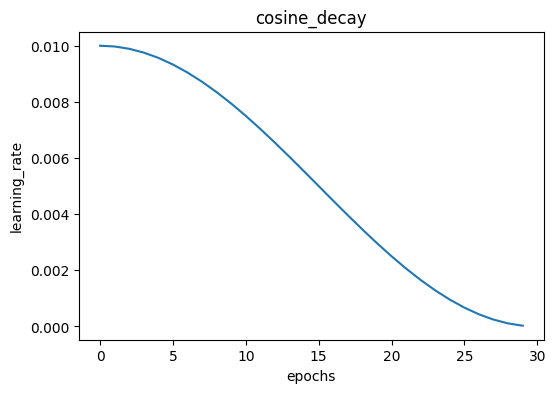

In [16]:
# cosine decay 원리

decay_steps = 30
alpha = 0.0
initial_learning_rate = 0.01

def decayed_learning_rate(step):
    step = min(step, decay_steps)
    cosine_decay = 0.5 * (1 + np.cos(np.pi * step / decay_steps))
    decayed = (1 - alpha) * cosine_decay + alpha
    return initial_learning_rate * decayed

steps_list = range(0,30)
lr_list = [decayed_learning_rate(step) for step in steps_list]

plot_scheduler(steps_list, lr_list, title='cosine_decay')

### CosineDecayRestart 적용하기
* tf.keras.optimizers.schedules.ConsineDecayRestart를 통해 사용할 수 있다.
* 기존 cosine함수 모양으로 감소하는 것에서 추가로 일정한 주기에 따라 cosine함수 모양과 같이 learning rate를 조절해가면서 학습시킨다.
* CosineDecay와 마찬가지로 callback이 아니므로 optimizer의 learning rate를 시용해야 한다.
* initial_learning_rate는 최초 learning_rate, first_decay_steps는 최초 decay_step 수
* t_mul는 전체 steps 수를 감안해서 얼마나 cosine annealing을 반복할 지 결정하는 계수이다.
* 만약 1이면 전체 steps/first_decay_steps, 2면 분모를 이전 값 대비 2배로 증가시킴. 결국 이전 cosine 감소하는 부분이 몇 epoch에 걸쳐 감소했는지 값 * t_mul이다.
* m_mul은 warm restart 수행시마다 적용될 초기 learning rate. 결국 초기 이전 learning_rate * m_mul이란 뜻이다. 따라서 cosine 함수를 진행할수록 learning rate의 시작값은 점점 작아지게 된다.
* alpha는 이전에 CosineDeacy와 같이 최소 learning rate를 결정해준다. 최소 learning rate는 initial_learning_rate * alpha로 설정한다.

tf.Tensor(
[9.9999998e-03 9.7552817e-03 9.0450849e-03 7.9389261e-03 6.5450845e-03
 4.9999994e-03 3.4549141e-03 2.0610737e-03 9.5491466e-04 2.4471758e-04
 8.9999996e-03 8.7797539e-03 8.1405761e-03 7.1450337e-03 5.8905766e-03
 4.4999993e-03 3.1094225e-03 1.8549655e-03 8.5942401e-04 2.2024583e-04
 8.0999993e-03 7.9017784e-03 7.3265182e-03 6.4305305e-03 5.3015170e-03
 4.0499992e-03 2.7984821e-03 1.6694688e-03 7.7348156e-04 1.9822051e-04
 7.2899992e-03 7.1116006e-03 6.5938658e-03 5.7874769e-03 4.7713653e-03
 3.6449991e-03 2.5186338e-03 1.5025219e-03 6.9613336e-04 1.7839845e-04
 6.5609990e-03 6.4004404e-03 5.9344810e-03 5.2087270e-03 4.2942287e-03
 3.2804993e-03 2.2667705e-03 1.3522718e-03 6.2651804e-04 1.6055861e-04
 5.9048990e-03 5.7603959e-03 5.3410325e-03 4.6878546e-03 3.8648059e-03
 2.9524493e-03 2.0400933e-03 1.2170445e-03 5.6386628e-04 1.4450274e-04
 5.3144088e-03 5.1843566e-03 4.8069293e-03 4.2190687e-03 3.4783252e-03
 2.6572042e-03 1.8360839e-03 1.0953400e-03 5.0747959e-04 1.3005246

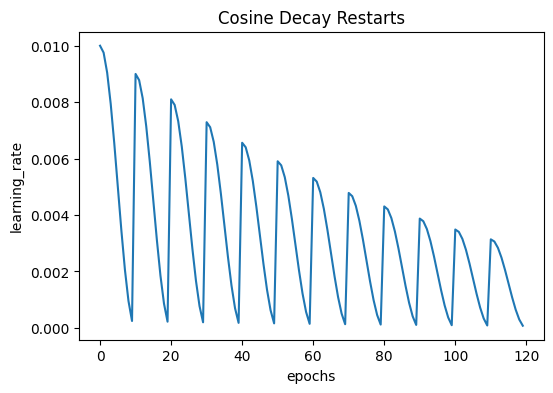

In [17]:
from tensorflow.keras.optimizers.schedules import CosineDecayRestarts

cosine_decay_restart = CosineDecayRestarts(initial_learning_rate=0.01, first_decay_steps=10, t_mul=1, m_mul=0.9, alpha=0)

steps_list = range(0,120)
lr_list = cosine_decay_restart(steps_list)

plot_scheduler(steps_list, lr_list, 'Cosine Decay Restarts')

print(lr_list)

In [18]:
model = Sequential([Dense(10)])
model.compile(optimizer=Adam(learning_rate=cosine_decay_restart), loss='mse')

history = model.fit(np.arange(100).reshape(5,20), np.zeros((5,1)), epochs=15, verbose=1)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step - loss: 2120.5747
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1376.6927
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 859.6696
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 550.4191
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 382.6563
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 292.1299
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 241.4432
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 211.8315
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 194.8219
Epoch 10/15


W0000 00:00:1710764177.439886      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 186.5927
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 184.3132
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 113.8282
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 77.2548
Epoch 14/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 65.5287
Epoch 15/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 66.1762


### Ramp Up and Step Down Decay
* Ramp up으로 warm up 수행 후 Step 형식으로 decay허는 방식
* Kaggle의 Chris Deotte가 제안한 방식

epoch: 0 lr: 1e-05
epoch: 1 lr: 0.0020080000000000002
epoch: 2 lr: 0.004006
epoch: 3 lr: 0.006004000000000001
epoch: 4 lr: 0.008002
epoch: 5 lr: 0.01
epoch: 6 lr: 0.01
epoch: 7 lr: 0.01
epoch: 8 lr: 0.01
epoch: 9 lr: 0.01
epoch: 10 lr: 0.01
epoch: 11 lr: 0.01
epoch: 12 lr: 0.01
epoch: 13 lr: 0.01
epoch: 14 lr: 0.01
epoch: 15 lr: 0.01
epoch: 16 lr: 0.01
epoch: 17 lr: 0.0075
epoch: 18 lr: 0.0075
epoch: 19 lr: 0.005625
epoch: 20 lr: 0.005625
epoch: 21 lr: 0.00421875
epoch: 22 lr: 0.00421875
epoch: 23 lr: 0.0031640625
epoch: 24 lr: 0.0031640625
epoch: 25 lr: 0.002373046875
epoch: 26 lr: 0.002373046875
epoch: 27 lr: 0.00177978515625
epoch: 28 lr: 0.00177978515625
epoch: 29 lr: 0.0013348388671875


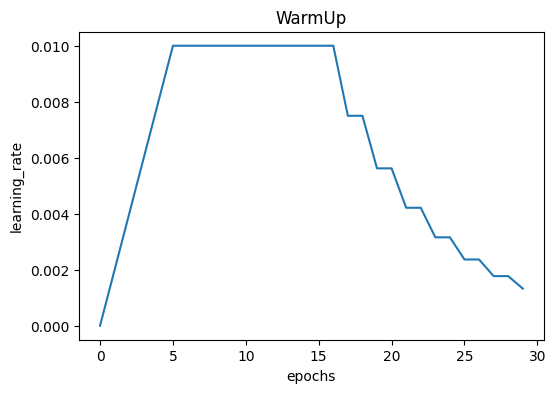

In [19]:
def lrfn(epoch):
    LR_START = 1e-5  # 초기 learning rate
    LR_MAX = 1e-2
    LR_RAMPUP_EPOCHS = 5  # ramup epoch 크기만큼 learning rate를 올리기를 반복한다.
    LR_SUSTAIN_EPOCHS = 10
    LR_STEP_DECAY = 0.75
    
    def calc_fn(epoch):
        if epoch < LR_RAMPUP_EPOCHS:
            lr = ((LR_MAX-LR_START) / LR_RAMPUP_EPOCHS) *epoch + LR_START
        elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
            lr = LR_MAX
        else:
            lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
        
        print('epoch:', epoch, 'lr:', lr)
        
        return lr
    
    return calc_fn(epoch)


lr_list = [lrfn(epoch) for epoch  in epochs_list]

plot_scheduler(epochs_list, lr_list, title='WarmUp')

In [20]:
model = Sequential([Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lrfn)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros((5,1)),
                    epochs=30, callbacks=[lr_scheduler], verbose=1)

epoch: 0 lr: 1e-05
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - loss: 3574.6121 - learning_rate: 1.0000e-05
epoch: 1 lr: 0.0020080000000000002
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2701.8718 - learning_rate: 0.0020
epoch: 2 lr: 0.004006
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1723835.3750 - learning_rate: 0.0040
epoch: 3 lr: 0.006004000000000001
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4569403392.0000 - learning_rate: 0.0060
epoch: 4 lr: 0.008002
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 27560125661184.0000 - learning_rate: 0.0080
epoch: 5 lr: 0.01
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 297171158032187392.0000 - learning_rate: 0.0100
epoch: 6 lr: 0.01
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5023479968705403682816.0000 - learning_rate: 0.0100
epoch: 7 lr: 0.01
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 84918571772397866838917120.0000 - learning_rate: 0.0100
epoch: 8

W0000 00:00:1710764178.737931      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1435491967510153894795681988608.0000 - learning_rate: 0.0100
epoch: 9 lr: 0.01
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 24266031325429824167277238687891456.0000 - learning_rate: 0.0100
epoch: 10 lr: 0.01
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: inf - learning_rate: 0.0100
epoch: 11 lr: 0.01
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: inf - learning_rate: 0.0100
epoch: 12 lr: 0.01
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: inf - learning_rate: 0.0100
epoch: 13 lr: 0.01
Epoch 14/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: inf - learning_rate: 0.0100
epoch: 14 lr: 0.01
Epoch 15/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: inf - learning_rate: 0.0100
epoch: 15 lr: 0.01
Epoch 16/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: inf - learning_rate: 0.0100
epoch: 16 lr: 0.01
Epoch 17/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: inf - learning_rate: 0.0100
epoch: 17 lr: 0.0